## Implementing Multiple Linear Regression

### Objective :- To predict the profits made by startup in different cities based on expenditures

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Importing Visualization libraries
import matplotlib.pyplot as plt

In [2]:
#Loading the Dataset of startups
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#Checking for the leangth i.e. no. of rows in a dataset
len(dataset)

50

In [4]:
#This shows that the dataset has 50 rows(observations) and 5 columns(features)
dataset.shape

(50, 5)

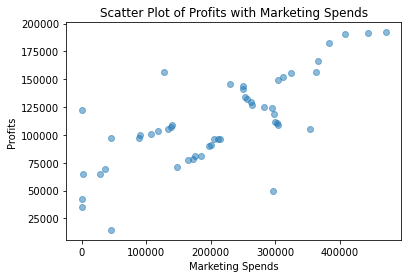

In [5]:
#Plotting the scatter plot for checking relationship between Marketing spend and profits
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter Plot of Profits with Marketing Spends')
plt.xlabel('Marketing Spends')
plt.ylabel('Profits')
plt.show()

Conclusion:-There is a Positive correlation between Marketing Spends and Profits

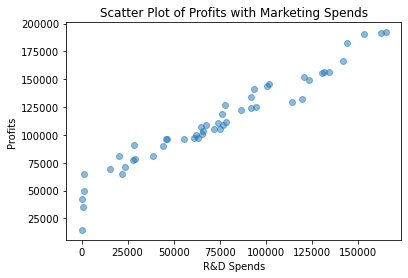

In [6]:
#Plotting the scatter plot for checking relationship R&D Spends and profits
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter Plot of Profits with Marketing Spends')
plt.xlabel('R&D Spends')
plt.ylabel('Profits')
plt.show()

Conclusion:- There is a High Correlation between Research and Development Spends with Profits.

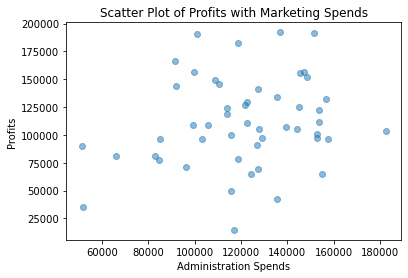

In [7]:
#Plotting the scatter plot for checking relationship Administration Spends and profits
plt.scatter(dataset['Administration'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter Plot of Profits with Marketing Spends')
plt.xlabel('Administration Spends')
plt.ylabel('Profits')
plt.show()

Conclution:- There is no correlation between Administration Spends and Profits.

Text(0, 0.5, 'Average Profits')

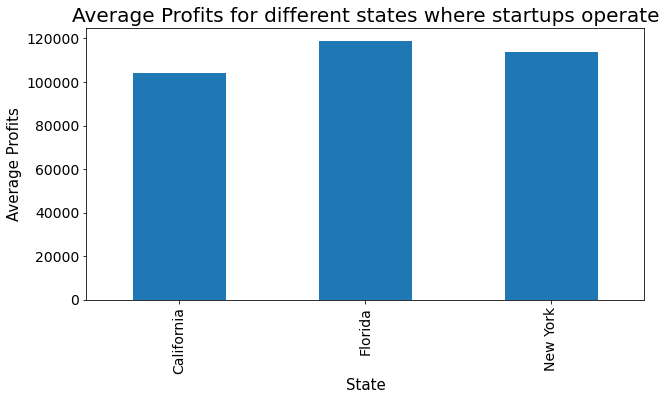

In [8]:
# Create a figure Object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
#Set the title
ax.set_title("Average Profits for different states where startups operate", fontsize = 20)
#Set X and Y labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Average Profits", fontsize = 15)

In [9]:
dataset.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

There are 17 startups in California and New York, whereas 16 startups operate in the state of Florida

In [10]:
# Create dummy variables for categorical data. OneHotEncoding can be used for the same purpose.
dataset['NewYork_state'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California',1,0)
dataset['Florida_state'] = np.where(dataset['State']=='Florida',1,0)
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,NewYork_state,California_State,Florida_state
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [11]:
# dropping the original state column
dataset.drop(columns='State', axis = 1, inplace = True)

In [12]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_state,California_State,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [13]:
#defining Profit as dependent variable as we want to predict the profits
dependent_var = 'Profit'
#defining other variables as Independent variables as list of variables
independent_var = list(set(dataset.columns.to_list())-{dependent_var})
print('Dependent Variable = ', dependent_var)
print('Independent Variables = ', independent_var)

Dependent Variable =  Profit
Independent Variables =  ['California_State', 'NewYork_state', 'Marketing Spend', 'R&D Spend', 'Florida_state', 'Administration']


In [14]:
dataset[independent_var]

,California_State,NewYork_state,Marketing Spend,R&D Spend,Florida_state,Administration
0,0,1,471784.10,165349.20,0,136897.80
1,1,0,443898.53,162597.70,0,151377.59
2,0,0,407934.54,153441.51,1,101145.55
3,0,1,383199.62,144372.41,0,118671.85
4,0,0,366168.42,142107.34,1,91391.77
5,0,1,362861.36,131876.90,0,99814.71
6,1,0,127716.82,134615.46,0,147198.87
7,0,0,323876.68,130298.13,1,145530.06
8,0,1,311613.29,120542.52,0,148718.95
9,1,0,304981.62,123334.88,0,108679.17


In [15]:
dataset[dependent_var]

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [16]:
#Creating the data of independent variables
X = dataset[independent_var].values
#Creating the dataset for dependent variables
y = dataset[dependent_var].values

In [17]:
# Splitting the dataset into traing and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [18]:
X_train[:10]

array([[0.0000000e+00, 0.0000000e+00, 2.1463481e+05, 5.5493950e+04,
        1.0000000e+00, 1.0305749e+05],
       [0.0000000e+00, 1.0000000e+00, 2.0551764e+05, 4.6014020e+04,
        0.0000000e+00, 8.5047440e+04],
       [0.0000000e+00, 0.0000000e+00, 1.3405007e+05, 7.5328870e+04,
        1.0000000e+00, 1.4413598e+05],
       [1.0000000e+00, 0.0000000e+00, 2.1079767e+05, 4.6426070e+04,
        0.0000000e+00, 1.5769392e+05],
       [0.0000000e+00, 0.0000000e+00, 2.9491957e+05, 9.1749160e+04,
        1.0000000e+00, 1.1417579e+05],
       [0.0000000e+00, 0.0000000e+00, 3.2387668e+05, 1.3029813e+05,
        1.0000000e+00, 1.4553006e+05],
       [0.0000000e+00, 0.0000000e+00, 2.5651292e+05, 1.1994324e+05,
        1.0000000e+00, 1.5654742e+05],
       [0.0000000e+00, 1.0000000e+00, 1.9039300e+03, 1.0002300e+03,
        0.0000000e+00, 1.2415304e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.4205000e+02,
        0.0000000e+00, 5.1743150e+04],
       [0.0000000e+00, 1.0000000e+00,

In [19]:
#Transforming data(Preprocessing Data/ Standardizing Data/ Normalizing Data)
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [20]:
X_train[:10]

array([[0.        , 0.        , 0.45494286, 0.33561668, 1.        ,
        0.48655174],
       [0.        , 1.        , 0.43561799, 0.2782839 , 0.        ,
        0.3173015 ],
       [0.        , 0.        , 0.28413435, 0.45557444, 1.        ,
        0.87258866],
       [1.        , 0.        , 0.44680961, 0.2807759 , 0.        ,
        1.        ],
       [0.        , 0.        , 0.62511553, 0.55488118, 1.        ,
        0.59103645],
       [0.        , 0.        , 0.68649342, 0.7880179 , 1.        ,
        0.88568959],
       [0.        , 0.        , 0.54370828, 0.72539353, 1.        ,
        0.98922572],
       [0.        , 1.        , 0.0040356 , 0.0060492 , 0.        ,
        0.6847981 ],
       [0.        , 1.        , 0.        , 0.00327821, 0.        ,
        0.00432296],
       [0.        , 1.        , 0.22709197, 0.39676926, 0.        ,
        0.95618996]])

In [21]:
#Fitting multiple linear regression to the training dataset
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [22]:
#This is the point on Y axis when X=0
regressor.intercept_

44153.95466784861

In [23]:
#Coefficients are the betas of the features
regressor.coef_

array([ 8.66383692e+01,  7.86007422e+02,  1.72720281e+04,  1.27892182e+05,
       -8.72645791e+02,  3.49927567e+03])

In [24]:
y_pred_train = regressor.predict(X_train)

In [25]:
#Actaul values observed in the training dataset
Y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [26]:
#Prediced values of Y dependent of the independent variables(X) from traing datset
y_pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [27]:
#Predicting the Test Results
y_pred = regressor.predict(X_test)
#predicted profits on test dataset
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [28]:
# Actual observed values of Y based on independen variables(X) in Test Dataset
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [29]:
mean_squared_error(Y_test, y_pred)

83502864.03257765

In [30]:
#Training Performance
math.sqrt(mean_squared_error(Y_train, y_pred_train))

9031.666612578967

In [31]:
#Test Performance
math.sqrt(mean_squared_error(Y_test, y_pred))

9137.990152794959

In [32]:
#R_squared score for training dataset. R-squared tells the how well the line has fit. Higher the score, better the fit
r2_score(Y_train,y_pred_train)

0.9501847627493607

In [33]:
#R_squared score for test Dataset
r2_score(Y_test, y_pred)

0.9347068473282423